# SVM model with orthogonal encoding, window size 17
In this model, we converted the sst3 sequence to orthogonal encoding and treated each character in the encoding as a feature. The window was chosen based on the results of experiments in related work. Since each encoding character is a feature, the amount of data grows very fast and a limit 'd' is set.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from keras.utils.np_utils import to_categorical

In [2]:
df = pd.read_csv('datasets/2018-06-06-pdb-intersect-pisces.csv')

window =17
aminoacids = 'ACDEFGHIKLMNPQRSTVWY*'
n = len(aminoacids)
matrice = np.identity(n)
aa_dict = {}
i = 0
for aa in aminoacids:
    aa_dict[aa] = matrice[i,]
    i += 1

In [3]:
tempdict = {}
codes = []
d = 30000 # a limit as there is so much data, the computer crashes
a = 0
data = {'H':0, 'E':0, 'C':0}
while (data['H'] + data['E'] + data['C']) < d:
    sequence = df.loc[a,'seq']
    seq_sst3 = df.loc[a,'sst3']
    i = 0
    while i <= (len(sequence)-window):
        j = 0
        if seq_sst3[int((i+i+window)/2)] == 'H':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 0
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['H'] += 1
        elif seq_sst3[int((i+i+window)/2)] == 'E':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 1
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['E'] += 1
        elif seq_sst3[int((i+i+window)/2)] == 'C':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 2
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['C'] += 1
        else:
            i += 1
    a += 1
df2 = pd.DataFrame(codes)
df2.loc[:30]

,a0a0,a0a1,a0a2,a0a3,a0a4,a0a5,a0a6,a0a7,a0a8,a0a9,...,a16a12,a16a13,a16a14,a16a15,a16a16,a16a17,a16a18,a16a19,a16a20,sst3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
X = df2.drop(['sst3'], axis=1)
y = df2['sst3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,a0a0,a0a1,a0a2,a0a3,a0a4,a0a5,a0a6,a0a7,a0a8,a0a9,...,a16a11,a16a12,a16a13,a16a14,a16a15,a16a16,a16a17,a16a18,a16a19,a16a20
count,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,...,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04
mean,2.541029e-17,-5.141153e-17,6.973057e-17,-7.563995e-17,-3.043326e-17,1.122780e-17,-3.693357e-17,-2.747857e-17,9.454993e-18,1.713718e-17,...,-3.043326e-17,-7.209432e-17,-1.905772e-17,1.181874e-18,7.800369e-17,-4.579762e-17,-1.772811e-17,-2.600123e-17,6.263933e-17,5.909371e-18
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,...,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-2.875031e-01,-1.634840e-01,-2.479668e-01,-3.000317e-01,-1.773104e-01,-2.651834e-01,-1.461621e-01,-2.373993e-01,-2.696469e-01,-3.154171e-01,...,-2.058949e-01,-2.003457e-01,-2.231818e-01,-2.504139e-01,-2.515373e-01,-2.252276e-01,-2.561773e-01,-1.079484e-01,-1.708441e-01,-3.289895e-02
25%,-2.875031e-01,-1.634840e-01,-2.479668e-01,-3.000317e-01,-1.773104e-01,-2.651834e-01,-1.461621e-01,-2.373993e-01,-2.696469e-01,-3.154171e-01,...,-2.058949e-01,-2.003457e-01,-2.231818e-01,-2.504139e-01,-2.515373e-01,-2.252276e-01,-2.561773e-01,-1.079484e-01,-1.708441e-01,-3.289895e-02
50%,-2.875031e-01,-1.634840e-01,-2.479668e-01,-3.000317e-01,-1.773104e-01,-2.651834e-01,-1.461621e-01,-2.373993e-01,-2.696469e-01,-3.154171e-01,...,-2.058949e-01,-2.003457e-01,-2.231818e-01,-2.504139e-01,-2.515373e-01,-2.252276e-01,-2.561773e-01,-1.079484e-01,-1.708441e-01,-3.289895e-02
75%,-2.875031e-01,-1.634840e-01,-2.479668e-01,-3.000317e-01,-1.773104e-01,-2.651834e-01,-1.461621e-01,-2.373993e-01,-2.696469e-01,-3.154171e-01,...,-2.058949e-01,-2.003457e-01,-2.231818e-01,-2.504139e-01,-2.515373e-01,-2.252276e-01,-2.561773e-01,-1.079484e-01,-1.708441e-01,-3.289895e-02
max,3.478224e+00,6.116808e+00,4.032798e+00,3.332981e+00,5.639826e+00,3.770975e+00,6.841721e+00,4.212312e+00,3.708554e+00,3.170405e+00,...,4.856846e+00,4.991372e+00,4.480653e+00,3.993388e+00,3.975554e+00,4.439953e+00,3.903547e+00,9.263686e+00,5.853289e+00,3.039610e+01


In [5]:
# instantiate classifier with rbf kernel and C=1.0
rbf_svc=SVC(kernel='rbf', C=1.0)
# fit classifier to training set
rbf_svc.fit(X_train,y_train)

SVC()

Model accuracy score with rbf kernel and C=1.0 : 0.7024
Training set score: 0.8829
Null accuracy score: 0.5047
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      3034
           1       0.64      0.30      0.41       888
           2       0.66      0.66      0.66      2090

    accuracy                           0.70      6012
   macro avg       0.68      0.60      0.62      6012
weighted avg       0.69      0.70      0.69      6012



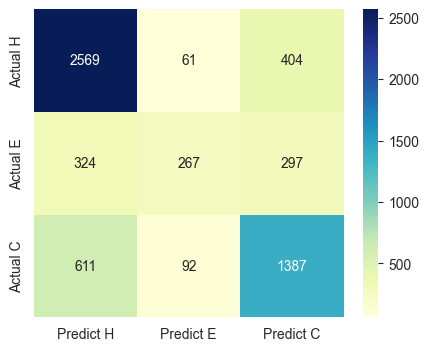

In [6]:
# make predictions on test set
y_pred_test=rbf_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
# check for overfitting and underfitting
print('Training set score: {:.4f}'.format(rbf_svc.score(X_train, y_train)))
# compare model accuracy with null accuracy
null_accuracy = (max(y_test.value_counts())/(sum(y_test.value_counts())))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))
# visualize confusion matrix with seaborn heatmap
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict H', 'Predict E', 'Predict C'],
                                 index=['Actual H', 'Actual E', 'Actual C'])
plt.figure(figsize = (5,4))
ax = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
# print classification report
print(classification_report(y_test, y_pred_test))

In [7]:
# instantiate rbf kernel clasifier with 6-fold cross-validation
kfold=KFold(n_splits=6, shuffle=True, random_state=0)
rbf_scores = cross_validate(rbf_svc, X, y, cv=kfold, scoring=['accuracy', 'neg_mean_absolute_error','neg_mean_squared_error'])
print('Stratified 6-fold cross-validation scores with SVM classifier:\n\n{}'.format(rbf_scores['test_accuracy']))
print('Average stratified 6-fold cross-validation score with SVM classifier:{:.4f}'.format(rbf_scores['test_accuracy'].mean()))
print('Average stratified 6-fold cross-validation MAE with SVM classifier:{:.4f}'.format(-rbf_scores['test_neg_mean_absolute_error'].mean()))
print('Average stratified 6-fold cross-validation MSE with SVM classifier:{:.4f}'.format(-rbf_scores['test_neg_mean_squared_error'].mean()))

Stratified 6-fold cross-validation scores with SVM classifier:

[0.70738523 0.70359281 0.70578842 0.70399202 0.70878244 0.71676647]
Average stratified 6-fold cross-validation score with SVM classifier:0.7077
Average stratified 6-fold cross-validation MAE with SVM classifier:0.4572
Average stratified 6-fold cross-validation MSE with SVM classifier:0.7870


In [7]:
rbf_svc=SVC(kernel='rbf', probability=True)
rbf_svc.fit(X_train,y_train)
y_pred_proba = rbf_svc.predict_proba(X_test)
y_test2 = to_categorical(y_test, num_classes = 3)

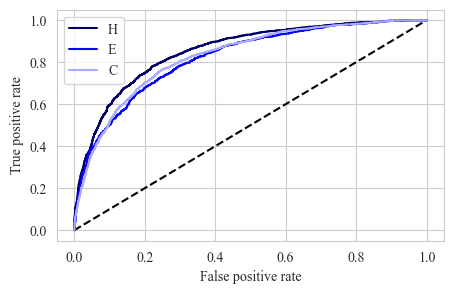

In [8]:
plt.rcParams['font.sans-serif'] = "Times New Roman"
fpr0, tpr0, thresholds0 = roc_curve(y_test2[:,0], y_pred_proba[:,0])
fpr1, tpr1, thresholds1 = roc_curve(y_test2[:,1], y_pred_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test2[:,2], y_pred_proba[:,2])
plt.figure(figsize = (5,3))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr0,tpr0, label='H', c='#000067')
plt.plot(fpr1,tpr1, label='E', c='#0707FF')
plt.plot(fpr2,tpr2, label='C', c='#AAAAFF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()